## Importing all the necessary packages

In [1]:
# Importing the Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Fraud Detection

### 1. Data Understanding and Preparation: [5 Marks]

#### 1A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

In [41]:
D1 = pd.read_csv('Data1.csv')
D2 = pd.read_csv('Data2.csv')

In [42]:
D1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [43]:
D2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...
4995,4996,0,0,0,1,0,0.0
4996,4997,85,0,0,1,0,0.0
4997,4998,0,0,0,0,0,0.0
4998,4999,0,0,0,1,0,0.0


#### 1B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

In [44]:
def details(df):
    n = [a for a in globals() if globals()[a] is df][1]
    print('Dataframe:', n)
    print('Shape:', df.shape)
    print(df.columns)
    print(df.dtypes)
    print('\n')

details(D1)
details(D2)

Dataframe: D1
Shape: (5000, 8)
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


Dataframe: D2
Shape: (5000, 7)
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object




#### 1C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

In [45]:
#Merging both the dataframes
Data = pd.merge(D1, D2, how='left', on='ID')

#### 1D. Change Datatype of below features to ‘Object’ [1 Marks]
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [46]:
def change_dtypes(*col):
    for col in col:
        Data[col] = Data[col].astype(object)
    print(Data.dtypes)

change_dtypes('CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore')

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


### 2. Data Exploration and Analysis: [5 Marks]

#### 2A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

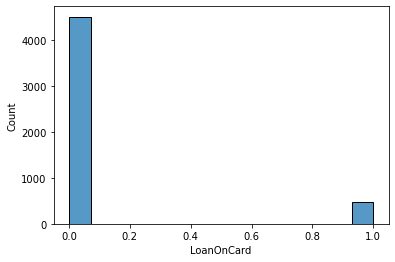

In [47]:
sns.histplot(data=Data, x='LoanOnCard');

##### Observation:
1. There are approx. 4500 '0' and 500 '1', which means majority. of the people have no Loan on Card.

#### 2B. Check the percentage of missing values and impute if required. [1 Marks]

In [48]:
Missing_Val = pd.DataFrame({'Value': Data.isnull().sum(), 'Percentage': Data.isnull().sum()/len(Data)*100})
Missing_Val

,Value,Percentage
ID,0,0.0
Age,0,0.0
CustomerSince,0,0.0
HighestSpend,0,0.0
ZipCode,0,0.0
HiddenScore,0,0.0
MonthlyAverageSpend,0,0.0
Level,0,0.0
Mortgage,0,0.0
Security,0,0.0


In [49]:
Data[Data['LoanOnCard'].isnull() == True]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


1. Here as the total missing value percentage is much less than 10%, & the missing value belongs to target variable and these missing values are at completely random i.e. no dependenecy is seen on other variables, it is better to avoid these missing values rather than to impute the dataset. Hence we drop these values from the dataset.
2. Further we create new dataset with these missing value dropped, rather than removing it from the original dataset.

In [50]:
DN = Data.dropna(axis=0)
DN.shape

(4980, 14)

In [51]:
DN.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

Hence we have created new dataframe 'DN' not have 20 rows that had missing values.

#### 2C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

In [52]:
DN.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [53]:
#checking for unexpected values in columns with 'int' datatype
#For any unexpected value like ['?', '/', '<', '>', '-', '_', '[', ']', '{', '}', ':', ';', ' ' ', ' "']in columns
#To check this we save the DN data frame as csv file & read it again with these missing values as na values.
DN.to_csv('DS.csv', index=False)

#Reload DN as DS file
DS = pd.read_csv('DS.csv', na_values = ['?', '/', '<', '>', '-', '_', '[', ']', '{', '}', ':', ';', ' '])
DS.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

Here it seems that no such unexpected values is present in the dataset.

1. However, if we can verify for different values present in object type column we can be sure that no unwanted value is present in it.
2. As categorical columns should have only integer values (like 0,1,2,3.....) stored as object type & no float values (like 0.5, 1.8....), we can verify such columns by value_counts. 

In [54]:
def check_object(*col):
    for col in col:
        if DN[col].dtypes == object:
            print(col)
            print(DN[col].value_counts(), '\n')

check_object('HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard')

HiddenScore
1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64 

Level
1    2089
3    1496
2    1395
Name: Level, dtype: int64 

Security
0    4460
1     520
Name: Security, dtype: int64 

FixedDepositAccount
0    4678
1     302
Name: FixedDepositAccount, dtype: int64 

InternetBanking
1    2974
0    2006
Name: InternetBanking, dtype: int64 

CreditCard
0    3514
1    1466
Name: CreditCard, dtype: int64 



Now we can be certain that there are no unexpected values present the DS dataset & hence we proceed with it. However we can proceed with the DN dataset as well, as it is similar to DN.

### 3. Data Preparation and model building: [10 Marks]

#### 3A. Split data into X and Y. [1 Marks]
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [55]:
#Splitting the dataset into x & y while dropping the columns ID & ZipCode
x = DS.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)
y = DS['LoanOnCard']

#### 3B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

In [56]:
#Splitting the data into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

#### 3C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

In [57]:
# Fitting & Training a model
DSLR = LogisticRegression(solver='liblinear')

DSLR.fit(x_train, y_train)

#Predicting the value on test dataset
y_pred_test = DSLR.predict(x_test)
y_pred_train = DSLR.predict(x_train)

#### 3D. Print evaluation metrics for the model and clearly share insights. [1 Marks]

The model Accuracy on Training Dataset is: 0.951004016064257
The model Accuracy on Testing Dataset is: 0.9477911646586346 

**************************************** Confusion Matrix ****************************************
[[  75   52]
 [  13 1105]] 

**************************************** DataFrame ****************************************
   Pred-1  Pred-0
1      75      52
0      13    1105 

**************************************** Classification Report ****************************************
              precision    recall  f1-score   support

           1       0.85      0.59      0.70       127
           0       0.96      0.99      0.97      1118

    accuracy                           0.95      1245
   macro avg       0.90      0.79      0.83      1245
weighted avg       0.94      0.95      0.94      1245
 

**************************************** HeatMap **************************************** 



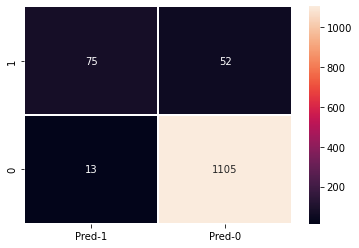

**************************************** ROC Curve **************************************** 



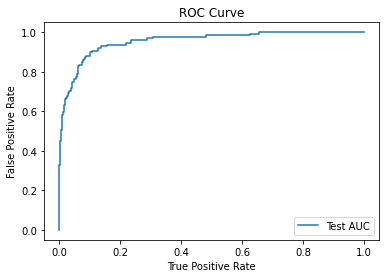

In [58]:
def roc(model):
        print('*'*40, '\033[1;3m''ROC Curve''\033[0m', '*'*40, '\n')
        y_test_pred = model.predict_proba(x_test)
        test_fpr, test_tpr, test_thres = roc_curve(y_test, y_test_pred[:,1])
        roc_auc = auc(test_fpr, test_tpr)
        plt.plot(test_fpr, test_tpr, label='Test AUC');
        plt.xlabel('True Positive Rate')
        plt.ylabel('False Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        
def mod_eval(model):
    print('The model Accuracy on Training Dataset is:', metrics.accuracy_score(y_train, y_pred_train))
    print('The model Accuracy on Testing Dataset is:', model.score(x_test, y_test), '\n')
    cm = metrics.confusion_matrix(y_test, y_pred_test, labels=[1,0])
    print('*'*40, '\033[1;3m''Confusion Matrix''\033[0m', '*'*40)
    print(cm, '\n')
    df = pd.DataFrame(cm, index=[1,0], columns=['Pred-1', 'Pred-0'])
    print('*'*40, '\033[1;3m''DataFrame''\033[0m', '*'*40)
    print(df, '\n')
    print('*'*40, '\033[1;3m''Classification Report''\033[0m', '*'*40)
    print(metrics.classification_report(y_test, y_pred_test, labels=[1,0]), '\n')
    print('*'*40, '\033[1;3m''HeatMap''\033[0m', '*'*40, '\n')
    sns.heatmap(df, annot=True, fmt='g', linewidths=2);
    plt.show()
    roc(model)
    


mod_eval(DSLR)

In [59]:
#Creating the DataFrame of Classification Report
DSLR_CR = metrics.classification_report(y_test, y_pred_test, labels=[1,0], output_dict=True)
DSLR_CR_df = pd.DataFrame(DSLR_CR).T.round(2)
print('Classification Report for DSLR Model')
DSLR_CR_df

Classification Report for DSLR Model


,precision,recall,f1-score,support
1,0.85,0.59,0.70,127.00
0,0.96,0.99,0.97,1118.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.90,0.79,0.83,1245.00
weighted avg,0.94,0.95,0.94,1245.00


#### 3E. Balance the data using the right balancing technique. [2 Marks]

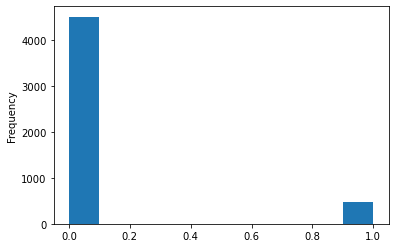

In [60]:
#check distribution of the target variable
y.plot(kind='hist');

### Balancing the Dataset with OverSampling

Before Balancing with OverSampling:
Class 0: 90.36%
Class 1: 9.64% 

After Balancing with OverSampling:
Class 0: 50.00%
Class 1: 50.00% 

Plotting the distribution of Target Variable


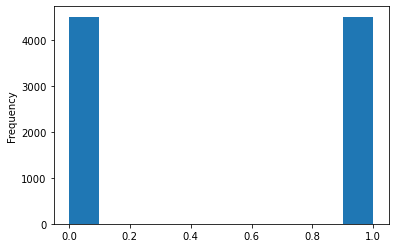

In [61]:
#TESTING with OverSampling
os = RandomOverSampler(random_state=42)
x_os, y_os = os.fit_resample(x, y)

#Before Balancing
print('Before Balancing with OverSampling:')
print('Class 0: {:.2f}%'.format(DS['LoanOnCard'].value_counts()[0]/len(DS)*100))
print('Class 1: {:.2f}%'.format(DS['LoanOnCard'].value_counts()[1]/len(DS)*100), '\n')

x_os = pd.DataFrame(x_os)
y_os = pd.DataFrame(y_os)

y_os=y_os.iloc[:,-1]

#After OverSampling
print('After Balancing with OverSampling:')
print('Class 0: {:.2f}%'.format(y_os.value_counts()[0]/len(y_os)*100))
print('Class 1: {:.2f}%'.format(y_os.value_counts()[1]/len(y_os)*100), '\n')

#Checking the target variable after performing OverSampling
print('Plotting the distribution of Target Variable')
y_os.plot(kind='hist');

#### 3F. Again train the same previous model on balanced data. [1 Marks]
##### After OverSampling

In [62]:
#Now as the dataset has been in ratio 50:50, we can use the Balanced dataset to form a new model.
#Splitting the dataset
x_tr, x_te, y_tr, y_te = train_test_split(x_os, y_os, test_size=0.25, random_state=1)

#Fitting the model & Training the model
DSOS = LogisticRegression(solver='liblinear')
DSOS.fit(x_tr, y_tr)

#Predicting the values
y_os_pred_tr = DSOS.predict(x_tr)
y_os_pred_te = DSOS.predict(x_te)

#### 3G. Print evaluation metrics and clearly share differences observed. [2 Marks]
##### After OverSampling

The model Accuracy for Training Dataset is: 0.8937777777777778
The model Accuracy for Testing Dataset is: 0.8973333333333333 

**************************************** Confusion Matrix ****************************************
[[1021  125]
 [ 106  998]] 

**************************************** DataFrame ****************************************
   Pred-1  Pred-0
1    1021     125
0     106     998 

**************************************** Classification Report ****************************************
              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1146
           0       0.89      0.90      0.90      1104

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250
 

**************************************** HeatMap **************************************** 



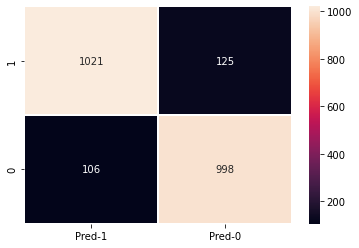

**************************************** ROC Curve **************************************** 



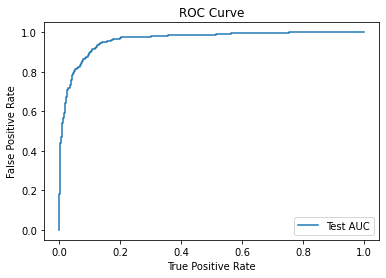

In [63]:
def roc_2(model):
        print('*'*40, '\033[1;3m''ROC Curve''\033[0m', '*'*40, '\n')
        y_os_te_pred = model.predict_proba(x_te)
        te_fpr, te_tpr, te_thres = roc_curve(y_te, y_os_te_pred[:,1])
        roc_auc = auc(te_fpr, te_tpr)
        plt.plot(te_fpr, te_tpr, label='Test AUC');
        plt.xlabel('True Positive Rate')
        plt.ylabel('False Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        
def mod_eval_2(model):
    print('The model Accuracy for Training Dataset is:', metrics.accuracy_score(y_tr, y_os_pred_tr))
    print('The model Accuracy for Testing Dataset is:', model.score(x_te, y_te), '\n')
    cm = metrics.confusion_matrix(y_te, y_os_pred_te, labels=[1,0])
    print('*'*40, '\033[1;3m''Confusion Matrix''\033[0m', '*'*40)
    print(cm, '\n')
    df = pd.DataFrame(cm, index=[1,0], columns=['Pred-1', 'Pred-0'])
    print('*'*40, '\033[1;3m''DataFrame''\033[0m', '*'*40)
    print(df, '\n')
    print('*'*40, '\033[1;3m''Classification Report''\033[0m', '*'*40)
    print(metrics.classification_report(y_te, y_os_pred_te, labels=[1,0]), '\n')
    print('*'*40, '\033[1;3m''HeatMap''\033[0m', '*'*40, '\n')
    sns.heatmap(df, annot=True, fmt='g', linewidths=2);
    plt.show()
    roc_2(model)

mod_eval_2(DSOS)

In [64]:
#Creating the DataFrame of Classification Report
DSOS_CR = metrics.classification_report(y_te, y_os_pred_te, labels=[1,0], output_dict=True)
DSOS_CR_df = pd.DataFrame(DSOS_CR).T.round(2)
print('Classification Report for DSOS Model')
DSOS_CR_df

Classification Report for DSOS Model


,precision,recall,f1-score,support
1,0.91,0.89,0.9,1146.0
0,0.89,0.90,0.9,1104.0
accuracy,0.90,0.90,0.9,0.9
macro avg,0.90,0.90,0.9,2250.0
weighted avg,0.90,0.90,0.9,2250.0


### Balancing the Dataset with Undersampling

Before Balancing with UnderSampling:
Class 0: 90.36%
Class 1: 9.64% 

After Balancing with UnderSampling
Class 0: 50.00%
Class 1: 50.00% 

Plotting the distribution of Target Variable


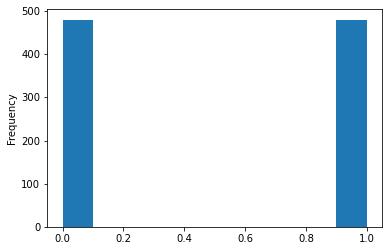

In [65]:
#TESTING with UnderSampling
us = RandomUnderSampler(random_state=42)
x_us, y_us = us.fit_resample(x, y)

#Before Balancing
print('Before Balancing with UnderSampling:')
print('Class 0: {:.2f}%'.format(DS['LoanOnCard'].value_counts()[0]/len(DS)*100))
print('Class 1: {:.2f}%'.format(DS['LoanOnCard'].value_counts()[1]/len(DS)*100), '\n')

x_us = pd.DataFrame(x_us)
y_us= pd.DataFrame(y_us)

y_us=y_us.iloc[:,-1]

#After Balancing
print('After Balancing with UnderSampling')
print('Class 0: {:.2f}%'.format(y_us.value_counts()[0]/len(y_us)*100))
print('Class 1: {:.2f}%'.format(y_us.value_counts()[1]/len(y_us)*100), '\n')

#Checking the target variable after performing OverSampling
print('Plotting the distribution of Target Variable')
y_us.plot(kind='hist');

#### 3F. Again train the same previous model on balanced data. [1 Marks]
##### After UnderSampling

In [66]:
#Now as the dataset has been in ratio 50:50, we can use the Balanced dataset to form a new model.
#Splitting the dataset
x_tr2, x_te2, y_tr2, y_te2 = train_test_split(x_us, y_us, test_size=0.25, random_state=1)

#Fitting the model & Training the model
DSUS = LogisticRegression(solver='liblinear')
DSUS.fit(x_tr2, y_tr2)

#Predicting the values
y_os_pred_tr2 = DSUS.predict(x_tr2)
y_os_pred_te2 = DSUS.predict(x_te2)

#### 3G. Print evaluation metrics and clearly share differences observed. [2 Marks]
##### After UnderSampling

The model Accuracy for Training Dataset is: 0.9083333333333333
The model Accuracy for Testing Dataset is: 0.8916666666666667 

**************************************** Confusion Matrix ****************************************
[[110  13]
 [ 13 104]] 

**************************************** DataFrame ****************************************
   Pred-1  Pred-0
1     110      13
0      13     104 

**************************************** Classification Report ****************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       123
           0       0.89      0.89      0.89       117

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240
 

**************************************** HeatMap **************************************** 



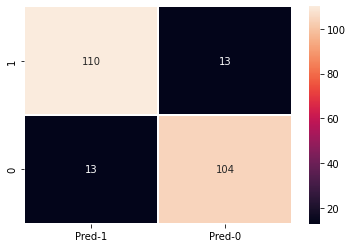

**************************************** ROC Curve **************************************** 



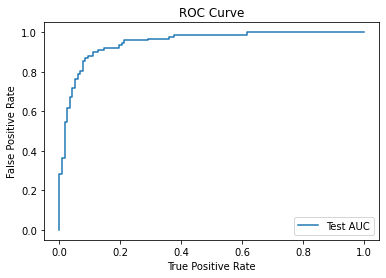

In [67]:
def roc_3(model):
        print('*'*40, '\033[1;3m''ROC Curve''\033[0m', '*'*40, '\n')
        y_os_te_pred2 = model.predict_proba(x_te2)
        te_fpr2, te_tpr2, te_thres2 = roc_curve(y_te2, y_os_te_pred2[:,1])
        roc_auc = auc(te_fpr2, te_tpr2)
        plt.plot(te_fpr2, te_tpr2, label='Test AUC');
        plt.xlabel('True Positive Rate')
        plt.ylabel('False Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
        
def mod_eval_3(model):
    print('The model Accuracy for Training Dataset is:', metrics.accuracy_score(y_tr2, y_os_pred_tr2))
    print('The model Accuracy for Testing Dataset is:', model.score(x_te2, y_te2), '\n')
    cm = metrics.confusion_matrix(y_te2, y_os_pred_te2, labels=[1,0])
    print('*'*40, '\033[1;3m''Confusion Matrix''\033[0m', '*'*40)
    print(cm, '\n')
    df = pd.DataFrame(cm, index=[1,0], columns=['Pred-1', 'Pred-0'])
    print('*'*40, '\033[1;3m''DataFrame''\033[0m', '*'*40)
    print(df, '\n')
    print('*'*40, '\033[1;3m''Classification Report''\033[0m', '*'*40)
    print(metrics.classification_report(y_te2, y_os_pred_te2, labels=[1,0]), '\n')
    print('*'*40, '\033[1;3m''HeatMap''\033[0m', '*'*40, '\n')
    sns.heatmap(df, annot=True, fmt='g', linewidths=2);
    plt.show()
    roc_3(model)

mod_eval_3(DSUS)

In [68]:
#Creating the DataFrame of Classification Report
DSUS_CR = metrics.classification_report(y_te2, y_os_pred_te2, labels=[1,0], output_dict=True)
DSUS_CR_df = pd.DataFrame(DSUS_CR).T.round(2)
print('Classification Report for DSUS Model')
DSUS_CR_df

Classification Report for DSUS Model


,precision,recall,f1-score,support
1,0.89,0.89,0.89,123.00
0,0.89,0.89,0.89,117.00
accuracy,0.89,0.89,0.89,0.89
macro avg,0.89,0.89,0.89,240.00
weighted avg,0.89,0.89,0.89,240.00


In [69]:
#Comparing the Classification Report for all the 3 models
print('Classification Report for Original Model: DSLR')
print(metrics.classification_report(y_test, y_pred_test, labels=[1,0]), '\n')
print('*'*70)
print('Classification Report for OverSampling Model: DSOS')
print(metrics.classification_report(y_te, y_os_pred_te, labels=[1,0]), '\n')
print('*'*70)
print('Classification Report for UnderSampling Model: DSUS')
print(metrics.classification_report(y_te2, y_os_pred_te2, labels=[1,0]), '\n')

Classification Report for Original Model: DSLR
              precision    recall  f1-score   support

           1       0.85      0.59      0.70       127
           0       0.96      0.99      0.97      1118

    accuracy                           0.95      1245
   macro avg       0.90      0.79      0.83      1245
weighted avg       0.94      0.95      0.94      1245
 

**********************************************************************
Classification Report for OverSampling Model: DSOS
              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1146
           0       0.89      0.90      0.90      1104

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250
 

**********************************************************************
Classification Report for UnderSampling Model: DSUS
              precision    recall  f1-score   supp

##### Observations:
1. The original model has highest accuracy, while it decreases with over sampling & decreses even further with under sampling.
2. The recall in original model for class 1 is significantly lower while that of clss 0 is much higher. After balancing the dataset the recall for both the class seems to be almost similar.
3. Similar pattern is also observed for F1-score which has difference in original model for both classes, but after balancing the F1-score is observed to be same for both the classes.
4. The ROC curve is best observed for the Over-Sampling Model as it tends more towards being ideal ROC curve.
5. Hence it is observed that the difference in frequency of classes in Original model is reduced after Balancing. This is achieved by:

   a. OverSampling - Samples of class 1 which are very less in Original model have been oversampled to achieve 50:50 ratio.
   
   b. UnderSampling - Samples of class 0 which are very high in Original modle have been undersampled to achieve 50:50 rati0.

### 4. Performance Improvement: [10 Marks]

#### 4A. Train a base model each for SVM, KNN. [4 Marks]

In [70]:
#For using SVM & KNN model we first scale the data using zscore
#Using zscore on independent varaible dataset (x dataset)
x_scale = x.apply(zscore)

#Now splitting the dataset in 75:25 ratio with 25% as test data
x_tra, x_tes, y_tra, y_tes = train_test_split(x_scale, y, test_size=0.25, random_state=1

                                             )
#Training & Fitting the model for KNN
DS_KNN = KNeighborsClassifier(weights='distance')

DS_KNN.fit(x_tra, y_tra)

#Predicting the values
#For Training Dataset
yknn_pred_tra = DS_KNN.predict(x_tra)
#For Testing Dataset
yknn_pred_tes = DS_KNN.predict(x_tes)

#Checking the score of Trainng & Testing Dataset for KNN Model
print('Performance of KNN Model')
print('The KNN Model Accuracy for Training Dataset is: {}'.format(metrics.accuracy_score(y_tra, yknn_pred_tra)))
print('The KNN Model Accuracy for Testing Dataset is: {}'.format(DS_KNN.score(x_tes, y_tes)), '\n')

#Training & Fitting the model for SVM
DS_SVM = svm.SVC(gamma=0.001)

DS_SVM.fit(x_tra, y_tra)

#Predicting the values
#For Training Dataset
ysvm_pred_tra = DS_SVM.predict(x_tra)
#For Testing Dataset
ysvm_pred_tes = DS_SVM.predict(x_tes)

#Checking the score for Training & Testing Dataset for SVM Model
print('Performance of SVM Model')
print('The SVM Model Accuracy for Training Dataset is: {}'.format(metrics.accuracy_score(y_tra, ysvm_pred_tra)))
print('The SVM Model Accuracy for Testing Dataset is: {}'.format(DS_SVM.score(x_tes, y_tes)), '\n')

#Generating Classification Report for Testing Dataset
print('Classification Report for KNN Model')
knn_cr = metrics.classification_report(y_tes, yknn_pred_tes)
print(knn_cr, '\n')
print('Classification Report for SVM Model')
svm_cr = metrics.classification_report(y_tes, ysvm_pred_tes)
print(svm_cr, '\n')

Performance of KNN Model
The KNN Model Accuracy for Training Dataset is: 1.0
The KNN Model Accuracy for Testing Dataset is: 0.9598393574297188 

Performance of SVM Model
The SVM Model Accuracy for Training Dataset is: 0.9242302543507362
The SVM Model Accuracy for Testing Dataset is: 0.9180722891566265 

Classification Report for KNN Model
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1118
         1.0       0.98      0.62      0.76       127

    accuracy                           0.96      1245
   macro avg       0.97      0.81      0.87      1245
weighted avg       0.96      0.96      0.96      1245
 

Classification Report for SVM Model
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1118
         1.0       1.00      0.20      0.33       127

    accuracy                           0.92      1245
   macro avg       0.96      0.60      0.64      1245
weighted avg       0.9

### 4B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]

In [71]:
#Experimenting with HyperParameters
kf = KFold(n_splits=3, shuffle=False)

#Tuning HyperParameters for KNN Model
knn = KNeighborsClassifier()
Neighbor = np.arange(1,30)

knn_pa = [{'n_neighbors': Neighbor, 'weights': ['distance', 'uniform'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

#Fitting & Training the model
knn_grid = GridSearchCV(estimator= knn, param_grid= knn_pa, cv=kf)
knn_grid.fit(x_tra,y_tra)


#Tuning HyperParameters for SVM Model
svm = svm.SVC()

svm_pa = [{'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001], 'C': [10000, 1000, 100, 10, 1, 0.1, 0.01]}]

#Fittig & Training the model
svm_grid = GridSearchCV(estimator=svm, param_grid=svm_pa, cv=kf)
svm_grid.fit(x_tra, y_tra)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid=[{'C': [10000, 1000, 100, 10, 1, 0.1, 0.01],
                          'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001,
                                    1e-05]}])

In [72]:
#For KNN Model
print('For KNN  Model')
print(knn_grid.best_score_)
print(knn_grid.best_estimator_)
print(knn_grid.best_params_, '\n')

#For SVM Model
print('For SVM Model')
print(svm_grid.best_score_)
print(svm_grid.best_estimator_)
print(svm_grid.best_params_)

For KNN  Model
0.9582329317269077
KNeighborsClassifier(n_neighbors=7, weights='distance')
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} 

For SVM Model
0.9809906291834003
SVC(C=1000, gamma=0.01)
{'C': 1000, 'gamma': 0.01}


### 4C. Print evaluation metrics for final model. [1 Marks]

In [73]:
#Evaluating Final KNN Model
print('-'*30, '\033[1;3m''KNN Final Model Performance''\033[0m', '-'*30)
#Predicting the values
#For Training Dataset
y_knn_pred_tra = knn_grid.predict(x_tra)
#For Testing Dataset
y_knn_pred_tes = knn_grid.predict(x_tes)
    
#Checking the Model Accuracy
print('KNN Final Model Accuracy')
#For Training Dataset
print('The Final KNN Model Accuracy for Training Dataset is: {}'.format(metrics.accuracy_score(y_tra, y_knn_pred_tra)))
#For Testing Dataset
print('The Final KNN Model Accuracy for Testing Dataset is: {}'.format(knn_grid.score(x_tes, y_tes)), '\n')
    
#Generating Confusion Matrix
print('KNN Final Model Confusion Matrix')
cm_knn = metrics.confusion_matrix(y_tes, y_knn_pred_tes, labels=[0, 1])
print(cm_knn, '\n')
    
#Generating Confusion Matrix DataFrame
print('KNN Final Model Confusion Matrix DataFrame')
cm_knn_df = pd.DataFrame(cm_knn, index=[0,1], columns=['Pred-0', 'Pred-1'])
print(cm_knn_df, '\n')
    
#Generating Classification Report
print('KNN Final Model Classification Report')
cr_knn = metrics.classification_report(y_tes, y_knn_pred_tes, labels=[0, 1])
print(cr_knn, '\n')
    

#Evaluating Final SVM Model
print('-'*30, '\033[1;3m''SVM Final Model Performance''\033[0m', '-'*30)
#Predicting the values
#For Training Dataset
y_svm_pred_tra = svm_grid.predict(x_tra)
#For Testing Dataset
y_svm_pred_tes = svm_grid.predict(x_tes)
    
#Checking the Model Accuracy
print('SVM Final Model Accuracy')
#For Training Dataset
print('The Final SVM Model Accuracy for Training Dataset is: {}'.format(metrics.accuracy_score(y_tra, y_svm_pred_tra)))
#For Testing Dataset
print('The Final SVM Model Accuracy for Testing Dataset is: {}'.format(svm_grid.score(x_tes, y_tes)), '\n')
    
#Generating Confusion Matrix
print('SVM Final Model Confusion Matrix')
cm_svm = metrics.confusion_matrix(y_tes, y_svm_pred_tes, labels=[0, 1])
print(cm_svm, '\n')
    
#Generating Confusion Matrix DataFrame
print('SVM Final Model Confusion Matrix DataFrame')
cm_svm_df = pd.DataFrame(cm_svm, index=[0,1], columns=['Pred-0', 'Pred-1'])
print(cm_svm_df, '\n')
    
#Generating Classification Report
print('SVM Final Model Classification Report')
cr_svm = metrics.classification_report(y_tes, y_svm_pred_tes, labels=[0, 1])
print(cr_svm, '\n')

------------------------------ KNN Final Model Performance ------------------------------
KNN Final Model Accuracy
The Final KNN Model Accuracy for Training Dataset is: 1.0
The Final KNN Model Accuracy for Testing Dataset is: 0.957429718875502 

KNN Final Model Confusion Matrix
[[1117    1]
 [  52   75]] 

KNN Final Model Confusion Matrix DataFrame
   Pred-0  Pred-1
0    1117       1
1      52      75 

KNN Final Model Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1118
           1       0.99      0.59      0.74       127

    accuracy                           0.96      1245
   macro avg       0.97      0.79      0.86      1245
weighted avg       0.96      0.96      0.95      1245
 

------------------------------ SVM Final Model Performance ------------------------------
SVM Final Model Accuracy
The Final SVM Model Accuracy for Training Dataset is: 0.9903614457831326
The Final SVM Model Accuracy for Testi

### 4D. Share improvement achieved from base model to final model. [2 Marks]

In [74]:
#Comparing KNN Base model & Final model Classification Report
print('-'*20, 'KNN Models Performance', '-'*20)
print('The KNN Base Model Accuracy Score: {}'.format(DS_KNN.score(x_tes, y_tes)))
print('The KNN Final Model Accuracy Score: {}'.format(knn_grid.score(x_tes, y_tes)), '\n')

print('*'*20, 'Base Model Classification Report', '*'*20)
print(knn_cr, '\n')
print('*'*20, 'Final Model Classification Report', '*'*20)
print(cr_knn, '\n')


#Comparing SVM Base model & Final model Classification Report
print('-'*20, 'SVM Models Performance', '-'*20)
print('The SVM Base Model Accuracy Score: {}'.format(DS_SVM.score(x_tes, y_tes)))
print('The SVM Final Model Accuracy Score: {}'.format(svm_grid.score(x_tes, y_tes)), '\n')
print('*'*20, 'Base Model Classification Report', '*'*20)
print(svm_cr, '\n')
print('*'*20, 'Final Model Classification Report', '*'*20)
print(cr_svm)

-------------------- KNN Models Performance --------------------
The KNN Base Model Accuracy Score: 0.9598393574297188
The KNN Final Model Accuracy Score: 0.957429718875502 

******************** Base Model Classification Report ********************
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1118
         1.0       0.98      0.62      0.76       127

    accuracy                           0.96      1245
   macro avg       0.97      0.81      0.87      1245
weighted avg       0.96      0.96      0.96      1245
 

******************** Final Model Classification Report ********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1118
           1       0.99      0.59      0.74       127

    accuracy                           0.96      1245
   macro avg       0.97      0.79      0.86      1245
weighted avg       0.96      0.96      0.95      1245
 

----------------

##### Observations:
A. KNN Model:
1. For the base model the n_neighbors was set to default i.e. 5, but for the final model, the number for n_neighbors obtained was 7.
2. The Base model accuracy & Final model accuracy are almost similar.
3. Precision can be said to be improved for Final model.

B. SVM Model:
1. For SVM Base Model the value of gamma was set to 0.001 C to it's default value 1,  but the best obtained value for gamma was 0.01 & that of C was 1000.
2. Significant improvement for accuracy is observed for Final model compared to that of Base model
3. Similarly improvement can be observed for Recall & F1-Score for Final model to that of Base model.
4. High improvement is also observed for Macro Avg. & Weighted Avg. for Final model which is not seen in base model